# Name             :  Project-1 - PIMA Diabetes dataset

Description      :  Requirement to build a model
                    to find the new person's chance of being diabetic or not being diabetic.
Input data file  :  diabetes.csv

### Importing libraries

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

### Load the data file

In [147]:
diab = pd.read_csv('diabetes.csv')

In [148]:
diab.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Summary of dataset

In [149]:
diab.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Based on the summary of dataset 
### min value of features (Glucose, BloodPressure, SkinThickness, Insulin, BMI) are zero.
#### BMI = 9 rows = 0
#### Insulin = 374 rows = 0
#### SkinThickness = 227 rowx = 0
#### BloodPressure = 35 rows = 0
#### Glucose = 5 rows = 0

In [150]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Check if there any null values in dataset

In [151]:
diab.isnull().values.any()

False

#### Minimum age of person, where the posibility of Diabetes

In [152]:
min_age_diab=diab[diab['Outcome'] == 1]['Age'].min()
min_age_diab

21

#### Maximum age of person, where likely the possibility of Diabetes

In [153]:
max_age_diab=diab[diab['Outcome'] == 1]['Age'].max()
max_age_diab

70

#### Minimum age of person, group by Outcome

In [154]:
diab.groupby('Outcome')['Age'].min()

Outcome
0    21
1    21
Name: Age, dtype: int64

#### Maximum age of person, group by Outcome

In [155]:
diab.groupby('Outcome')['Age'].max()

Outcome
0    81
1    70
Name: Age, dtype: int64

In [156]:
diab['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

From the given dataset, 500 women don't have diabetes and 268 have diabetes

#### Visualize the distribution of variable or relationship between multiple variables separately within the subset of the dataset

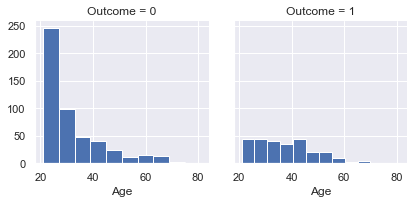

In [157]:
x = sns.FacetGrid(diab, col="Outcome")
x.map(plt.hist, "Age")

Looks the above graph on Age based on the Outcome, not informative. Since from the dataset, diabetes is quiet common in all age groups

In [158]:
diab.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


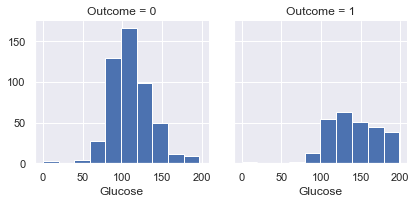

In [159]:
x = sns.FacetGrid(diab, col="Outcome")
x.map(plt.hist, "Glucose")

Looks from the given dataset, Glucose level higher is also Non-diabetic. Based on FacetGrid

#### Histogram plot to find the frequency of occurrence in continuos data set for BMI feature and group by Outcome

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000214E25B6E10>,
      dtype=object)

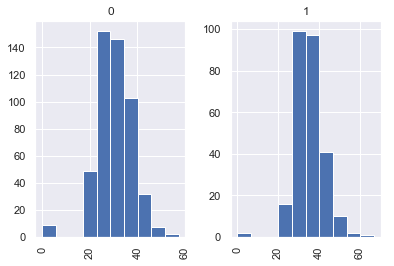

In [160]:
diab.hist(by="Outcome", column = "BMI")

Looks the frequency of occurrence is also evenly distributed for BMI feature based on Outcome

#### Countplot shows the number of occurrences of each instances of the independent Outcome variable

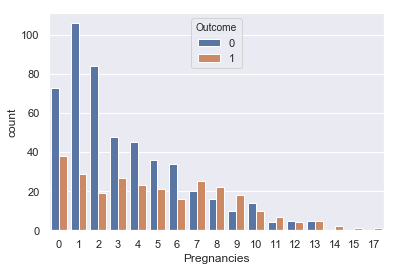

In [161]:
sns.countplot(x="Pregnancies", hue="Outcome", data=diab)

Based on the above countplot, even the more number of pregnancies doesn't have Diabetic result

#### Distplot to identify the distribution of Glucose variable in dataset

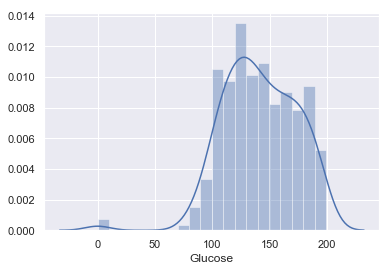

In [162]:
sns.distplot(diab[diab['Outcome']==1]['Glucose'],bins=20)

Glucose level from dataset is ranging mostly between 110 and 190 for Diabetic

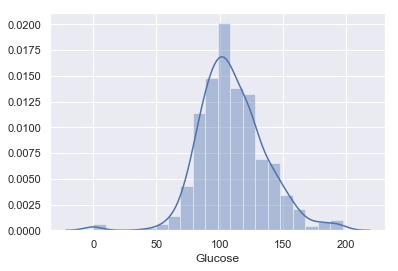

In [163]:
sns.distplot(diab[diab['Outcome']==0]['Glucose'],bins=20)

Glucose level from dataset is mostly ranging between 80 to 120 for Non-Diabetic

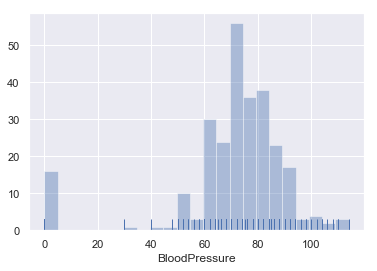

In [164]:
sns.distplot(diab[diab['Outcome']==1]['BloodPressure'], kde=False, rug=True)

BloodPressure level from dataset is ranging mostly between 60 to 90 for Diabetic Persons

In [165]:
diab.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


#### Jointplot to find the distribution of data from datatset for bi-variat analysis

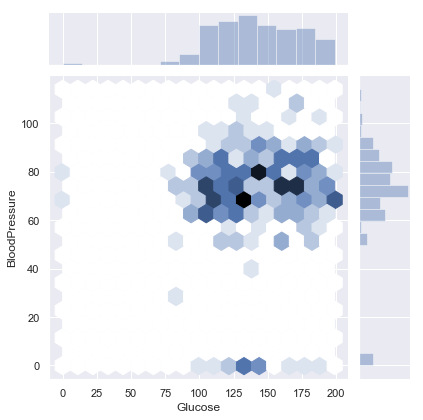

In [166]:
sns.jointplot(diab[diab['Outcome']==1]['Glucose'],diab[diab['Outcome']==1]['BloodPressure'],kind='hex')

For Diabetic, the Glucose is more than 125

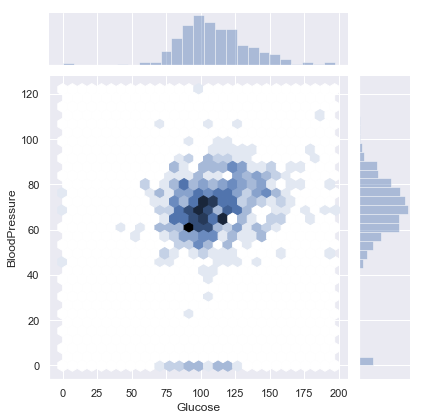

In [167]:
sns.jointplot(diab[diab['Outcome']==0]['Glucose'],diab[diab['Outcome']==0]['BloodPressure'],kind='hex')

For Non-Diabetic the average glucose is under 125 

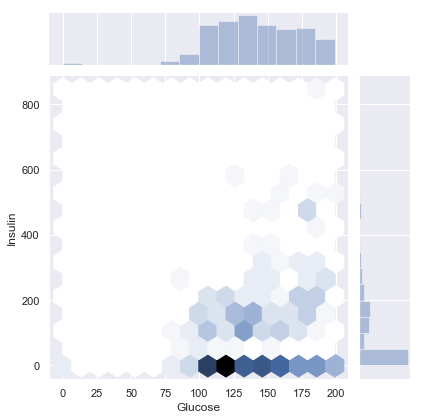

In [168]:
sns.jointplot(diab[diab['Outcome']==1]['Glucose'],diab[diab['Outcome']==1]['Insulin'],kind='hex')

For those diabetic and Glucose level higher than 125 are taking Insulin

#### PairPlot to visualize the relationship between the variables

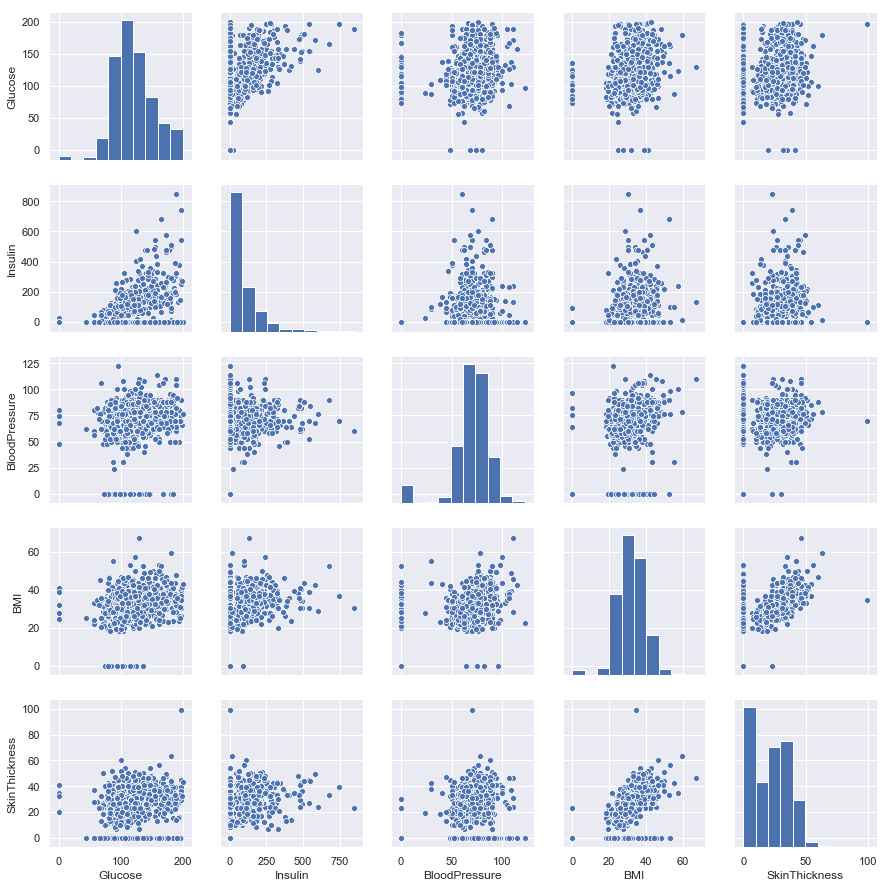

In [169]:
sns.pairplot(diab[['Glucose','Insulin','BloodPressure','BMI','SkinThickness']])

If Diagnal plots have kind of normal curve then data is correlated

In [170]:
diab_corr= diab.corr()

In [171]:
diab_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


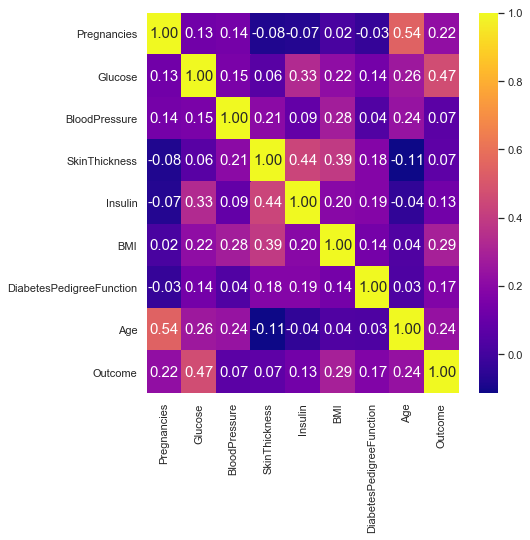

In [172]:
plt.figure(figsize=(7,7))
sns.heatmap(diab_corr,annot=True,annot_kws={'size': 15},cmap='plasma',fmt='.2f')

Looks Age with Pregnancies and Glucose are highly correlated

#### To find the density of BMI range in the dataset based on the Outcome using stripplot

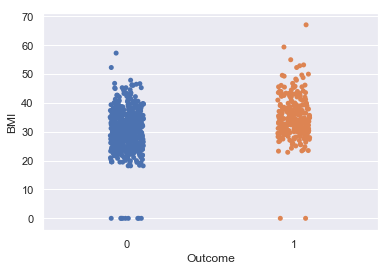

In [173]:
sns.stripplot(diab['Outcome'],diab['BMI'],jitter=True)

For those diabteic the BMI density ranges between 30 to 40

#### To find the density of Glucose in the given dataset based on the Outcome using swarmplot (Same as stripplot, just to avoid overlap)

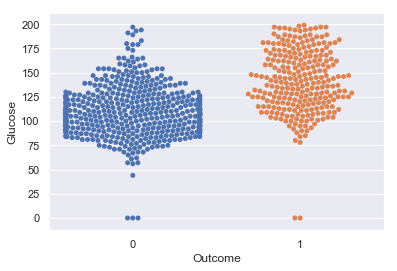

In [174]:
sns.swarmplot(diab['Outcome'],diab['Glucose'])

In [175]:
diab.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


#### To capture the outliers in the dataset

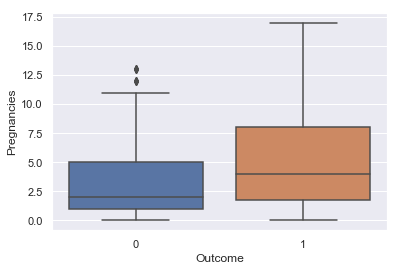

In [176]:
sns.boxplot( diab['Outcome'], diab['Pregnancies'])

The Outliers are identified in the Non-diabetic data. And in diabetic data, its found that the 
     (Minimum value lies in 0 pregnancies, 
     25th percentile lies in 2 pregnancies,  
     50th percentile lies in 4 pregnancies, 
     75th percentile lies in 8 pregnancies, 
     Maximum value lies in 17 pregnancies)

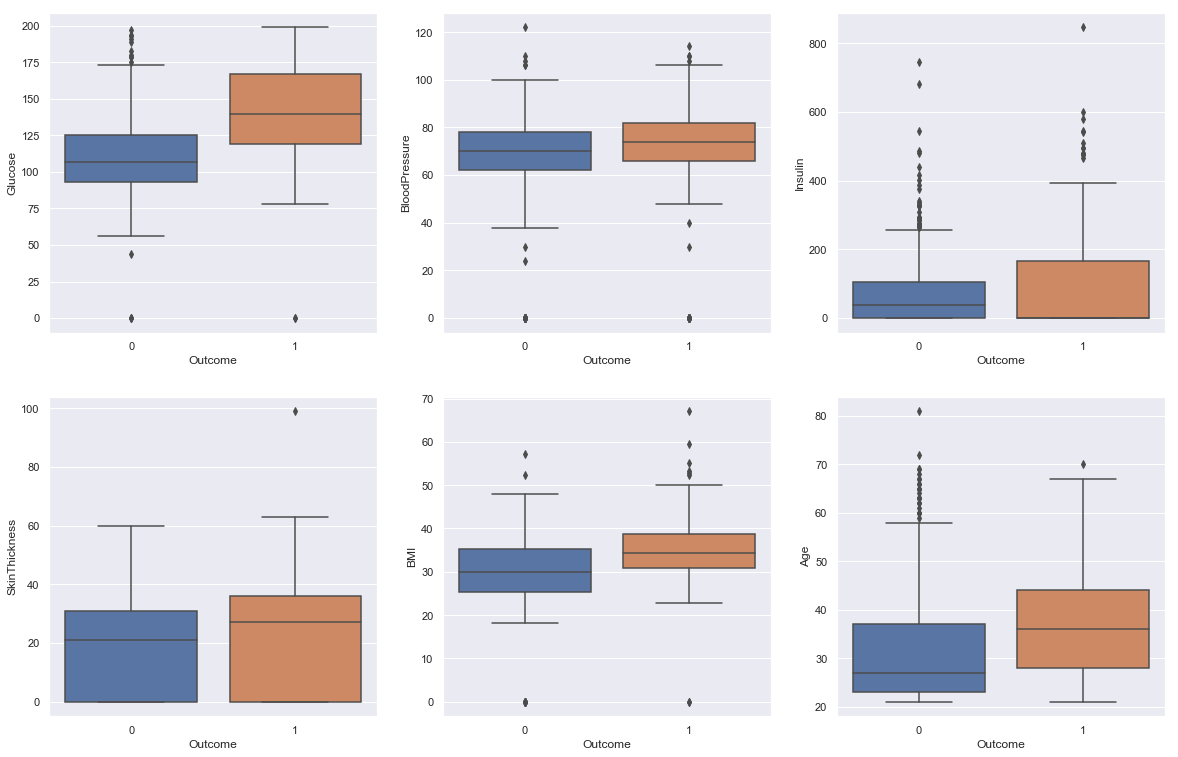

In [177]:
plt.figure(figsize=(20,20))
x_column = 'Outcome'
y_column = ['Glucose','BloodPressure','Insulin','SkinThickness','BMI','Age']
for idx, col in enumerate(y_column):
    plt.subplot(3, 3, idx + 1)
    sns.boxplot( diab[x_column], diab[col])

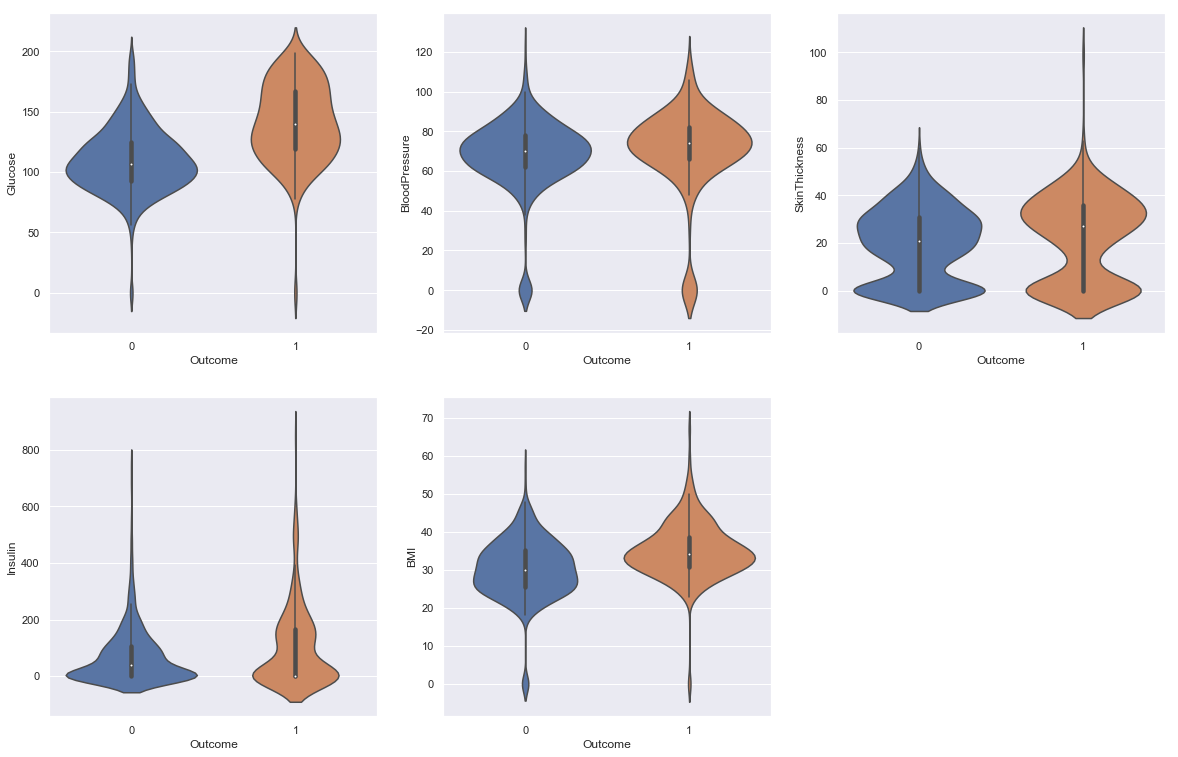

In [178]:
plt.figure(figsize=(20,20))
x=diab['Outcome']
y=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for idx, y_col in enumerate(y):
    plt.subplot(3, 3, idx+1)
    sns.violinplot(x, diab[y_col], data=diab)

More the SkinThickness is also likely to be diabetic

### Data Cleaning

In [179]:
clean_diab=pd.read_csv('diabetes.csv')

#### Find the mean of the given dataset

In [180]:
diab.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

#### Find the median of the given dataset

In [181]:
diab.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [182]:
diab.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


Taking mean value for BMI from the diab data variable, which is 31.99

In [183]:
clean_diab.loc[clean_diab['BMI']==0,'BMI'] = 31.99

In [184]:
clean_diab[clean_diab['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [185]:
clean_diab.loc[clean_diab['Glucose']==0,'Glucose'] = 120.89
clean_diab.loc[clean_diab['BloodPressure']==0,'BloodPressure'] = 69.10

In [186]:
clean_diab.mean()

Pregnancies                   3.845052
Glucose                     121.681576
BloodPressure                72.254557
SkinThickness                20.536458
Insulin                      79.799479
BMI                          32.450768
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [187]:
diab.loc[diab['Glucose']!=0].mean()

Pregnancies                   3.851900
Glucose                     121.686763
BloodPressure                69.115334
SkinThickness                20.477064
Insulin                      80.292267
BMI                          31.986763
DiabetesPedigreeFunction      0.472477
Age                          33.271298
Outcome                       0.348624
dtype: float64

In [188]:
clean_diab.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [189]:
clean_diab.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99.0,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100.0,NaN,NaN,NaN,NaN,0.258,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000214E5863C88>,
      dtype=object)

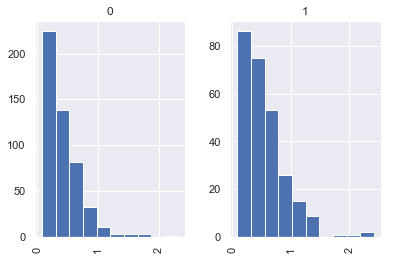

In [190]:
clean_diab.hist(column='DiabetesPedigreeFunction', by = 'Outcome')

In [191]:
Overweight_diab=((diab['BMI'] >= 35) & (diab['Outcome'] == 1)).sum()
Overweight_diab

118

In [192]:
Overweight_nondiab=((diab['BMI'] >= 35) & (diab['Outcome'] == 0)).sum()
Overweight_nondiab

130

In [193]:
Overweight_clean_diab=((clean_diab['BMI'] >= 35) & (clean_diab['Outcome'] == 1)).sum()
Overweight_clean_diab

118

In [194]:
Overweight_clean_nondiab=((clean_diab['BMI'] >= 35) & (clean_diab['Outcome'] == 0)).sum()
Overweight_clean_nondiab

130

There are 118 womens diabetic with overweight and 130 with non-diabetic and overweight. So from the dataset we can't confirm with BMI values but possibly it can be.

### Conclusion

### Based on the given dataset, below are the conclusion on findings
##### 1. For those Glucose level greater than 125 are likely to be Diabetic
##### 2. Those whose BMI level more tha 35 are likely to be Diabetic
##### 3. Those whose Age is greater tah 40 are possibly to be Diabetic
##### 4. Those who had more than 4 pregnancies are possibly to be Diabetic